<h1> Introduction </h1>

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul>
<li> What is the most enormous LEGO set ever created and how many parts did it have? </li>
<li> How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched? </li>
<li> Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes? </li>
<li> When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year? </li>
<li> Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?</li>
</ul>

<strong> Data Source </strong>

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
colours_df = pd.read_csv('data\colors.csv')

In [5]:
colours_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [6]:
colours_df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [7]:
colours_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [9]:
colours_df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [10]:
sets_df = pd.read_csv('data\sets.csv')

In [11]:
sets_df.head()
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [12]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [15]:
sets_df.loc[sets_df['year'].idxmin()]

set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 9521, dtype: object

In [27]:
(sets_df['year'].values == 1949).sum()

5

In [28]:
sets_df[sets_df.year == 1949].count()

set_num      5
name         5
year         5
theme_id     5
num_parts    5
dtype: int64

In [31]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [36]:
set_by_year = sets_df.groupby('year').count()
set_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


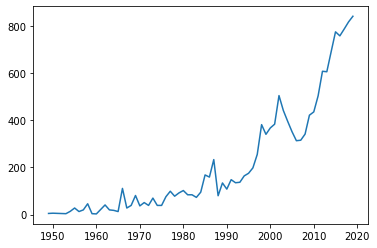

In [41]:
plt.plot(set_by_year.index[:-2], set_by_year.set_num[:-2])

In [42]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})

In [43]:
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


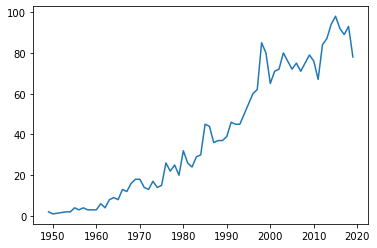

In [46]:
plt.plot(themes_by_year.index[:-2], themes_by_year.theme_id[:-2])

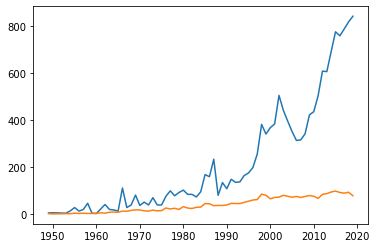

In [47]:
plt.plot(set_by_year.index[:-2], set_by_year.set_num[:-2])
plt.plot(themes_by_year.index[:-2], themes_by_year.theme_id[:-2])

Text(0, 0.5, 'Number of Themes')

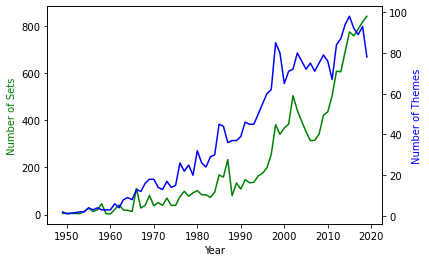

In [52]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(set_by_year.index[:-2], set_by_year.set_num[:-2], 'g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.theme_id[:-2], 'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

In [57]:
parts_by_year = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})

In [58]:
parts_by_year.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


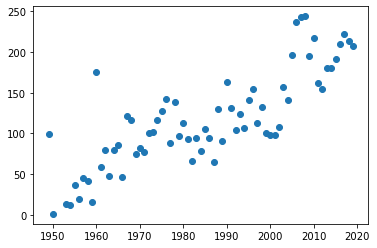

In [61]:
plt.scatter(parts_by_year.index[:-2], parts_by_year.num_parts[:-2])

In [63]:
themes = pd.read_csv('data/themes.csv')

In [64]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [78]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [79]:
sets_df[sets_df.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [80]:
sets_df[sets_df.theme_id == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [118]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [119]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [120]:
merged_df = pd.merge(set_theme_count, themes, on='id')

In [121]:
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

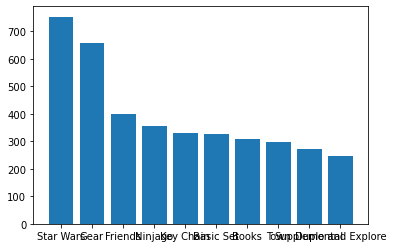

In [122]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

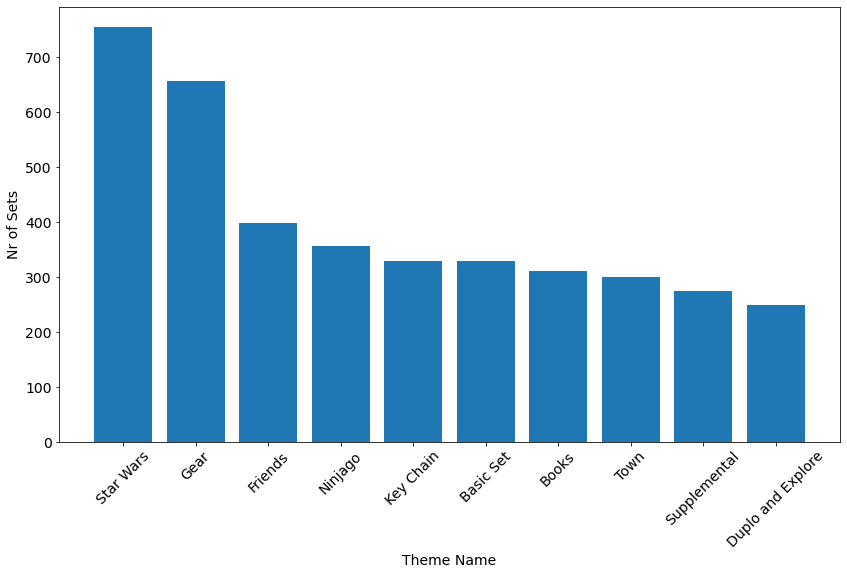

In [123]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])